In [3]:
import sys
import os
import textwrap
import numpy as np
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import copy, math
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [5]:
print(textwrap.fill(sys.version),'\n')
print("Pandas version: {0}".format(pd.__version__),'\n')
#print("Matplotlib version: {0}".format(matplotlib.__version__),'\n')
print("Numpy version: {0}".format(np.__version__),'\n')
print("Seaborn version: {0}".format(sns.__version__),'\n')

3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)] 

Pandas version: 1.4.2 

Numpy version: 1.21.6 

Seaborn version: 0.11.2 



In [6]:
## So all output comes through from Ipython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# getting working directory
print(os.getcwd())

C:\Users\tua0\Desktop\ML\BRFSS Survey data\BiNit


In [8]:
df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = pd.read_sas('LLCP2021.XPT',encoding = 'UTF-8')
C:\Users\tua0\AppData\Local\Temp\1\ipykernel_17156\2828048442.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

In [9]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
0,1.0,1.0,01192021,01,19,2021,1100.0,2021000001,2.021000e+09,1.0,...,1.0,1.0,100.0,214.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
1,1.0,1.0,01212021,01,21,2021,1100.0,2021000002,2.021000e+09,1.0,...,1.0,1.0,100.0,128.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
2,1.0,1.0,01212021,01,21,2021,1100.0,2021000003,2.021000e+09,1.0,...,1.0,1.0,100.0,71.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
3,1.0,1.0,01172021,01,17,2021,1100.0,2021000004,2.021000e+09,1.0,...,1.0,1.0,114.0,165.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
4,1.0,1.0,01152021,01,15,2021,1100.0,2021000005,2.021000e+09,1.0,...,1.0,1.0,100.0,258.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


In [10]:
# Print dataframe shape
df.shape
df.dtypes

(438693, 303)

_STATE      float64
FMONTH      float64
IDATE        object
IMONTH       object
IDAY         object
             ...   
_VEGLT1A    float64
_FRT16A     float64
_VEG23A     float64
_FRUITE1    float64
_VEGETE1    float64
Length: 303, dtype: object

In [11]:
NullValues=df.isnull().sum()/len(df)
#null =df.apply(lambda x: 1-(x.count()/x.size))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (NullValues)

_STATE      0.000000
FMONTH      0.000000
IDATE       0.000000
IMONTH      0.000000
IDAY        0.000000
IYEAR       0.000000
DISPCODE    0.000000
SEQNO       0.000000
_PSU        0.000000
CTELENM1    0.731507
PVTRESD1    0.731507
COLGHOUS    0.999932
STATERE1    0.731507
CELPHON1    0.731507
LADULT1     0.731507
COLGSEX     0.999932
NUMADULT    0.731550
LANDSEX     0.886376
NUMMEN      0.850834
NUMWOMEN    0.850834
RESPSLCT    0.852599
SAFETIME    0.268493
CTELNUM1    0.268495
CELLFON5    0.268493
CADULT1     0.268493
CELLSEX     0.268498
PVTRESD3    0.268493
CCLGHOUS    0.997139
CSTATE1     0.268493
LANDLINE    0.268493
HHADULT     0.268498
SEXVAR      0.000000
GENHLTH     0.000009
PHYSHLTH    0.000007
MENTHLTH    0.000005
POORHLTH    0.467933
PRIMINSR    0.000007
PERSDOC3    0.000005
MEDCOST1    0.000011
CHECKUP1    0.000005
EXERANY2    0.000005
BPHIGH6     0.000005
BPMEDS      0.607623
CHOLCHK3    0.000005
TOLDHI3     0.138676
CHOLMED3    0.140351
CVDINFR4    0.000005
CVDCRHD4    0

In [12]:
NullValues.where(NullValues > 0.10).dropna().count()

178

In [13]:
null=NullValues.where(NullValues > 0.10).dropna()
null_names = null.index.values
df_1 = df.drop(null_names, axis=1)
df_1.shape
df_2 = df_1.dropna()#dropping all the rows containing any null values
df_2.shape
df=df_2

(438693, 125)

(356654, 125)

In [14]:
#Dropping classes with options 7 and 9
df['CVDSTRK3'].value_counts() 
df_2 = df[df['CVDSTRK3']<3]
df_2['CVDSTRK3'].value_counts() 
df =df_2

2.0    341680
1.0     14212
7.0       738
9.0        24
Name: CVDSTRK3, dtype: int64

2.0    341680
1.0     14212
Name: CVDSTRK3, dtype: int64

In [15]:
df.shape

(355892, 125)

##### https://www.youtube.com/watch?v=ycyCtxZ0a9w
# Feature selections: 1. Filter methods, 2. Embedded Methods, 3. Wrapper Methods
## 1) Basic statistics Filter Methods
### 1.1) Constant Features

In [16]:
constvar =(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY','IYEAR', 'DISPCODE', 'SEQNO', '_PSU'])

In [17]:
df = df.drop(constvar, axis=1)
df.shape

(355892, 116)

#### In order to avoid overfitting, feature selection should only be applied to the training set. Splitting data into train and test

In [18]:
y= df['CVDSTRK3']
X = df.drop('CVDSTRK3', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=5)

In [20]:
# I keep a copy of X_train & X_test with all the variables to measure the performance of machine learning models
X_train_org = X_train.copy()
y_train_org = y_train.copy()
X_test_org = X_test.copy()
y_test_org = y_test.copy()

In [21]:
y_train.value_counts() 

2.0    273348
1.0     11365
Name: CVDSTRK3, dtype: int64

#### Constant Features: Constant features are the features which has same value for all the observations. yherefore it is advisable to remove them. We are using variance thresold function to identify constant features. This method can not be used for categorical variables. It is only used for numerical variables. This method does not considers dependent variable and correlations.

In [22]:
X_train.shape

(284713, 115)

In [23]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
#Fitting and transforming data
X_train1 = constant_filter.fit_transform(X_train)
X_train.shape

(284713, 115)

#### 1.2) Quasi-constant Features

In [24]:
# increase thresold to 0.01 to identify qusi constant features
#for one hot encoded variables it is recommended to use Bernouli thresold i.e. if p=0.8 then Bernouli thresold=0.8(1-0.8)
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.01)
#Fitting and transforming data
X_train1 = constant_filter.fit_transform(X_train)
X_train.shape

(284713, 115)

####  1.3) Duplicated features

In [25]:
duplicate_feat = []
for i in range(0, len(X_train.columns)):
    col_1 = X_train.columns[i]
    
    for col_2 in X_train.columns[i+1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicate_feat.append(col_2)
            
len(duplicate_feat)

1

In [26]:
duplicate_feat

['_DRDXAR3']

In [27]:
X_train[duplicate_feat].head(20)

,_DRDXAR3
100833,2.0
67152,2.0
71144,1.0
107901,1.0
361619,1.0
12029,2.0
264026,2.0
236233,1.0
382591,2.0
420543,1.0


In [28]:
X_train.drop(duplicate_feat,axis=1)
X_test.drop(duplicate_feat,axis=1)

,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,...,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
100833,1.0,2.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,3.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
67152,2.0,5.0,77.0,88.0,3.0,2.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
71144,1.0,4.0,88.0,88.0,5.0,1.0,2.0,1.0,2.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
107901,1.0,2.0,88.0,88.0,3.0,2.0,2.0,1.0,2.0,3.0,...,5.397605e-79,1.000000e+00,1.0,5.397605e-79,2.0,9.0,1.0,1.0,5.397605e-79,1.000000e+00
361619,2.0,5.0,15.0,88.0,3.0,2.0,2.0,2.0,2.0,3.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282296,2.0,2.0,88.0,88.0,3.0,2.0,2.0,1.0,2.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
150550,1.0,2.0,3.0,88.0,1.0,1.0,2.0,1.0,1.0,3.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
24312,2.0,1.0,88.0,88.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
22090,2.0,3.0,88.0,88.0,3.0,1.0,2.0,1.0,2.0,1.0,...,5.397605e-79,5.397605e-79,1.0,1.000000e+00,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINSR,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,BPHIGH6,...,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1
416221,1.0,3.0,30.0,88.0,1.0,1.0,2.0,3.0,1.0,3.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,2.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
244242,1.0,3.0,3.0,88.0,3.0,2.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
24825,1.0,2.0,88.0,20.0,88.0,1.0,1.0,1.0,2.0,3.0,...,1.000000e+00,5.397605e-79,5.397605e-79,1.0,9.0,1.0,1.0,1.0,1.000000e+00,5.397605e-79
184540,2.0,2.0,88.0,88.0,3.0,2.0,2.0,1.0,1.0,2.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
412697,2.0,2.0,88.0,10.0,1.0,3.0,2.0,4.0,1.0,3.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,1.0,2.0,1.0,1.0,5.397605e-79,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298305,2.0,2.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
322098,2.0,2.0,88.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
287433,1.0,1.0,88.0,88.0,1.0,1.0,2.0,1.0,1.0,1.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79
82165,2.0,2.0,10.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,5.397605e-79,5.397605e-79,1.000000e+00,1.0,1.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79


## 2) correlation coefficient

In [29]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>  threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(X_train, 0.5)
print(len(set(corr_features)))

47


In [31]:
print(corr_features)

{'_MISFRT1', '_INCOMG1', '_LMTWRK3', '_MICHD', '_LLCPWT', '_HLTHPLN', '_MRACE1', '_AGEG5YR', '_VEGETE1', 'HTM4', '_FRTLT1A', '_ASTHMS1', '_AGE_G', '_RFHLTH', '_RACEGR3', '_FRUITE1', '_TOTINDA', '_RACE', 'DROCDY3_', '_CASTHM1', 'DRNKANY5', '_DRNKWK1', '_RACEG21', '_CHLDCNT', '_DRDXAR3', '_FRTRES1', '_WT2RAKE', '_VEGRES1', '_RFHYPE6', '_DUALUSE', '_RFDRHV7', '_RFBING5', '_RAWRAKE', '_CHOLCH3', '_HCVU652', '_AIDTST4', '_RACEPRV', '_SMOKER3', '_URBSTAT', '_LMTACT3', '_EDUCAG', '_VEGLT1A', '_LLCPWT2', 'HTIN4', '_AGE80', '_SEX', '_AGE65YR'}


In [32]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
X_train.shape
X_test.shape

(284713, 68)

(71179, 68)

In [33]:
# Display variable names,type and info in the memory:
%whos

Variable                 Type                 Data/Info
-------------------------------------------------------
InteractiveShell         MetaHasTraits        <class 'IPython.core.inte<...>eshell.InteractiveShell'>
NullValues               Series               _STATE      0.0\nFMONTH  <...>ngth: 303, dtype: float64
OneHotEncoder            type                 <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
RandomForestClassifier   ABCMeta              <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
VarianceThreshold        ABCMeta              <class 'sklearn.feature_s<...>shold.VarianceThreshold'>
X                        DataFrame                    SEXVAR  GENHLTH  <...>55892 rows x 115 columns]
X_test                   DataFrame                    SEXVAR  GENHLTH  <...>[71179 rows x 68 columns]
X_test_org               DataFrame                    SEXVAR  GENHLTH  <...>71179 rows x 115 columns]
X_train                  DataFrame                    SEXVAR  GENHLTH  <

In [34]:
X_train.shape
y_train.shape

(284713, 68)

(284713,)

In [35]:
rf = RandomForestClassifier(max_depth=20, random_state=45)
rf.fit(X_train, y_train)
importance = rf.feature_importances_

RandomForestClassifier(max_depth=20, random_state=45)

<AxesSubplot:>

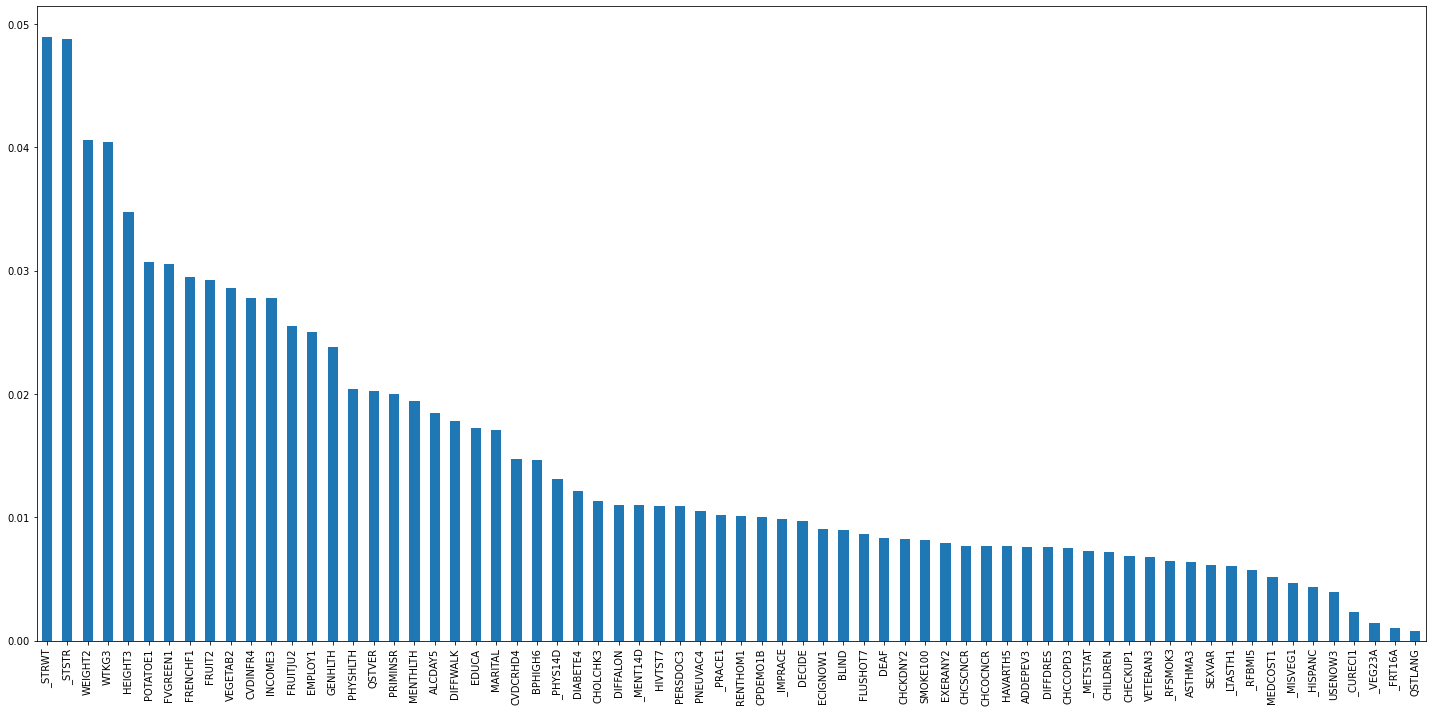

In [36]:
#plt.figure(figsize=(12,16))
plt.rcParams["figure.figsize"]=20,10
forest_importances = pd.Series(importance, index=X_train.columns)
forest_importances=forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar()
fig.tight_layout()

In [37]:
print(forest_importances.axes)

[Index(['_STRWT', '_STSTR', 'WEIGHT2', 'WTKG3', 'HEIGHT3', 'POTATOE1',
       'FVGREEN1', 'FRENCHF1', 'FRUIT2', 'VEGETAB2', 'CVDINFR4', 'INCOME3',
       'FRUITJU2', 'EMPLOY1', 'GENHLTH', 'PHYSHLTH', 'QSTVER', 'PRIMINSR',
       'MENTHLTH', 'ALCDAY5', 'DIFFWALK', 'EDUCA', 'MARITAL', 'CVDCRHD4',
       'BPHIGH6', '_PHYS14D', 'DIABETE4', 'CHOLCHK3', 'DIFFALON', '_MENT14D',
       'HIVTST7', 'PERSDOC3', 'PNEUVAC4', '_PRACE1', 'RENTHOM1', 'CPDEMO1B',
       '_IMPRACE', 'DECIDE', 'ECIGNOW1', 'BLIND', 'FLUSHOT7', 'DEAF',
       'CHCKDNY2', 'SMOKE100', 'EXERANY2', 'CHCSCNCR', 'CHCOCNCR', 'HAVARTH5',
       'ADDEPEV3', 'DIFFDRES', 'CHCCOPD3', '_METSTAT', 'CHILDREN', 'CHECKUP1',
       'VETERAN3', '_RFSMOK3', 'ASTHMA3', 'SEXVAR', '_LTASTH1', '_RFBMI5',
       'MEDCOST1', '_MISVEG1', '_HISPANC', 'USENOW3', '_CURECI1', '_VEG23A',
       '_FRT16A', 'QSTLANG'],
      dtype='object')]


In [38]:
rf_delfeatures =(['_PHYS14D', 'DIABETE4', 'DIFFALON', 'CHOLCHK3', 'PERSDOC3',
        'HIVTST7', '_MENT14D', 'CPDEMO1B', 'PNEUVAC4', 'RENTHOM1', '_PRACE1',
        'DECIDE', '_IMPRACE', 'BLIND', 'ECIGNOW1', 'DEAF', 'DIFFDRES',
        'FLUSHOT7', 'CHCOCNCR', 'EXERANY2', 'SMOKE100', 'CHCSCNCR', 'CHCKDNY2',
        'CHCCOPD3', 'ADDEPEV3', 'HAVARTH5', '_METSTAT', 'CHILDREN', 'CHECKUP1',
        'ASTHMA3', 'VETERAN3', '_LTASTH1', '_RFSMOK3', 'SEXVAR', '_RFBMI5',
        'MEDCOST1', '_MISVEG1', '_HISPANC', 'USENOW3', '_CURECI1', '_VEG23A',
        '_FRT16A', 'QSTLANG'])# selecting all the features except top25 important features

In [39]:
X_train=X_train.drop(rf_delfeatures,axis=1)
X_test=X_test.drop(rf_delfeatures,axis=1)
X_train.shape
X_test.shape

(284713, 25)

(71179, 25)

In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(X_train.dtypes) # all the features are float so no need for one hot encoding

GENHLTH     float64
PHYSHLTH    float64
MENTHLTH    float64
PRIMINSR    float64
BPHIGH6     float64
CVDINFR4    float64
CVDCRHD4    float64
MARITAL     float64
EDUCA       float64
EMPLOY1     float64
INCOME3     float64
WEIGHT2     float64
HEIGHT3     float64
DIFFWALK    float64
ALCDAY5     float64
FRUIT2      float64
FRUITJU2    float64
FVGREEN1    float64
FRENCHF1    float64
POTATOE1    float64
VEGETAB2    float64
QSTVER      float64
_STSTR      float64
_STRWT      float64
WTKG3       float64
dtype: object


## Implementing Synthetic Minority Oversampling TEchnique (SMOTE) : to deal with imbalance datset

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state = 2)

In [43]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [44]:
X_train_res.shape
y_train_res.shape

(546696, 25)

(546696,)

In [45]:
# comparing ouput variable before and after application of SMOTE
y_train.value_counts() 
y_train_res.value_counts() 

2.0    273348
1.0     11365
Name: CVDSTRK3, dtype: int64

2.0    273348
1.0    273348
Name: CVDSTRK3, dtype: int64

## Logistics regression from SKLearn

In [46]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=10000)

In [47]:
log_y_pred_res = lr_model.predict(X_test)

In [48]:
print(classification_report(y_test, log_y_pred_res))

              precision    recall  f1-score   support

         1.0       0.08      0.71      0.15      2847
         2.0       0.98      0.68      0.80     68332

    accuracy                           0.68     71179
   macro avg       0.53      0.69      0.48     71179
weighted avg       0.95      0.68      0.78     71179



In [59]:
y_score_log = lr_model.predict_proba(X_test)[:, 1]

In [56]:
y_score

array([0.38893544, 0.41540862, 0.81739277, ..., 0.68704611, 0.29343744,
       0.26131806])

## Naive Bayes using SKLearn

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [58]:
nb_y_pred_res = gnb.predict(X_test)
print(classification_report(y_test, nb_y_pred_res))

              precision    recall  f1-score   support

         1.0       0.05      0.75      0.09      2847
         2.0       0.97      0.36      0.52     68332

    accuracy                           0.37     71179
   macro avg       0.51      0.55      0.30     71179
weighted avg       0.93      0.37      0.50     71179



In [60]:
y_score_nb = gnb.predict_proba(X_test)[:, 1]

## Random Forest using SKLearn

In [61]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]
RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [62]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train_res,y_train_res) 
    predictions_train = model.predict(X_train_res) ## The predicted values for the train dataset
    predictions_val = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train_res)
    accuracy_val = accuracy_score(predictions_val,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

In [63]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 8, 
                                             min_samples_split = 10).fit(X_train_res,y_train_res)

In [64]:
rf_y_pred_res = random_forest_model.predict(X_test)

In [65]:
pred_prob = random_forest_model.predict_proba(X_test)

In [66]:
rf_per = classification_report(y_test, rf_y_pred_res)
print(rf_per)
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         1.0       0.16      0.31      0.21      2847
         2.0       0.97      0.93      0.95     68332

    accuracy                           0.91     71179
   macro avg       0.57      0.62      0.58     71179
weighted avg       0.94      0.91      0.92     71179



In [67]:
y_score_rf = random_forest_model.predict_proba(X_test)[:, 1]

## MLP Classifier

In [71]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 5)
mlp.fit(X_train_res, y_train_res)
y_predict_mlp = mlp.predict(X_test)

MLPClassifier(random_state=5)

In [72]:
mlp_per = classification_report(y_test,y_predict_mlp)
print(mlp_per)
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         1.0       0.10      0.71      0.17      2847
         2.0       0.98      0.72      0.83     68332

    accuracy                           0.72     71179
   macro avg       0.54      0.72      0.50     71179
weighted avg       0.95      0.72      0.80     71179



In [73]:
y_score_mlp = mlp.predict_proba(X_test)[:, 1]

## Support Vector Machine(SVM) from SKLearn

In [ ]:
from sklearn import svm
'''
Kernel coefficient for ''rbf','poly' and 'sigmoid'.
current default is 'auto' which uses (1/n_features),
if ``gamma='scale'`` is passes then it uses 1/(n_features*X.var())
as value of gamma.
'''
classifier = svm.SVC(kernel='rbf', gamma='auto' , C=1.5)

In [ ]:
classifier.fit(X_train_res, y_train_res)
svm_y_pred_res = classifier.predict(X_test)

In [ ]:
svc_per_res =classification_report(y_test, svm_y_pred_res)
print(svc_per)
warnings.filterwarnings('ignore')

In [ ]:
print("Random forest Algorithm")
print(rf_per)
print("Performance of Support Vector Machine")

print(rf_per_res)

## ROC of resampled data

In [49]:
y_test_bi = label_binarize(y_test, classes = np.unique(y_test))

log_fpr, log_tpr, thresold = roc_curve(y_test_bi, log_y_pred_res)
log_auc = auc(log_fpr, log_tpr)

nb_fpr, nb_tpr, thresold = roc_curve(y_test_bi, nb_y_pred_res)
nb_auc = auc(nb_fpr, nb_tpr)

rf_fpr, rf_tpr, thresold = roc_curve(y_test_bi, rf_y_pred_res)
rf_auc = auc(rf_fpr, rf_tpr)

mlp_fpr, mlp_tpr, thresold = roc_curve(y_test_bi, y_predict_mlp)
mlp_auc = auc(mlp_fpr, mlp_tpr)

plt.figure(figsize = (10, 5), dpi = 100)
plt.plot(log_fpr, log_tpr, linestyle= '--', label='Logistic Regression (auc = %0.3f)' % log_auc)
plt.plot(nb_fpr, nb_tpr, linestyle= '--', label='Naive Bayes (auc = %0.3f)' % nb_auc)
plt.plot(rf_fpr, rf_tpr, linestyle= '--', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.plot(mlp_fpr, mlp_tpr, linestyle= '--', label='MLP Classifier (auc = %0.3f)' % mlp_auc)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show();

NameError: name 'nb_y_pred_res' is not defined

## Precision-Recall Curve as the original training data was skewed

Text(0.5, 1.0, 'Precision-Recall Curve')

Text(0, 0.5, 'Precision')

Text(0.5, 0, 'Recall')

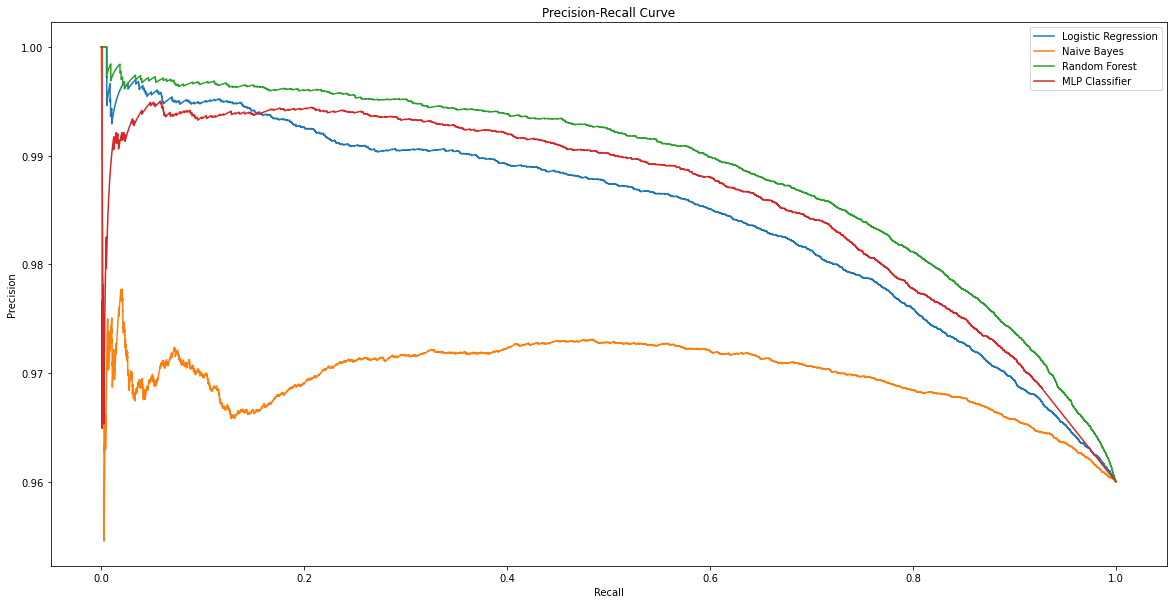

In [74]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
precision_log, recall_log, thresholds_log = precision_recall_curve(y_test_bi, y_score_log)

precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_test_bi, y_score_nb)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_bi, y_score_rf)

precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y_test_bi, y_score_mlp)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall_log, precision_log,label='Logistic Regression')
ax.plot(recall_nb, precision_nb,label='Naive Bayes')
ax.plot(recall_rf, precision_rf,label='Random Forest')
ax.plot(recall_mlp, precision_mlp,label='MLP Classifier')
#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.legend(loc='upper right')
#display plot
plt.show()